In [1]:
import random

import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from see import Segmentors
from see import JupyterGUI

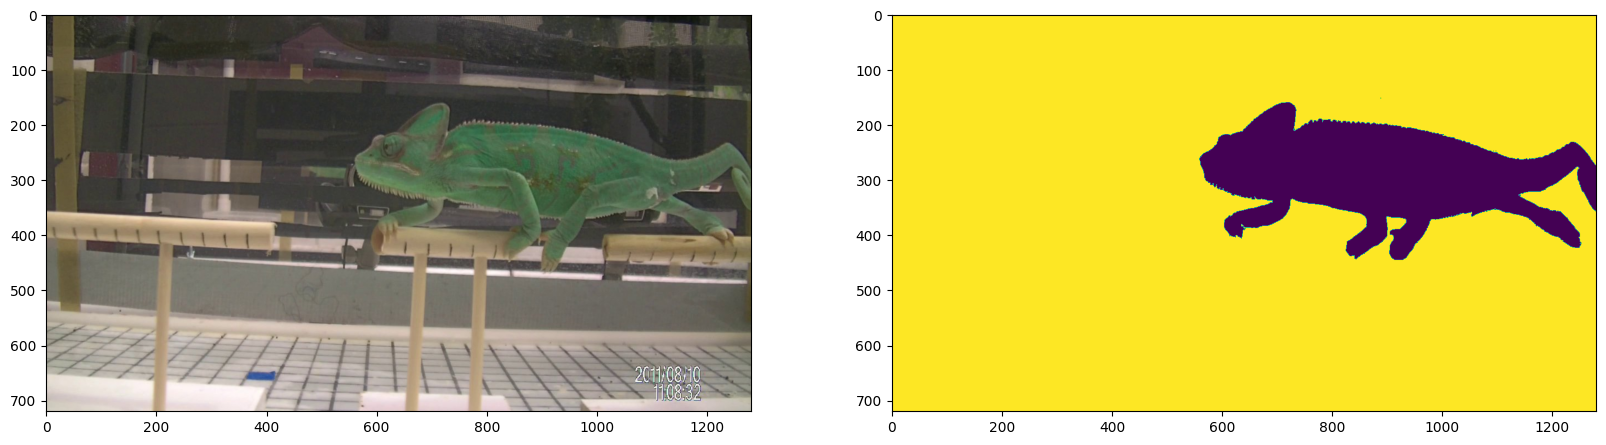

In [2]:
from imageio import v3 as imageio

img = imageio.imread('./Image_data/Examples/AA_Chameleon.jpg')
gmask = imageio.imread('./Image_data/Examples/AA_Chameleon_GT.png')

fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(img)
my_ax = fig.add_subplot(1, 2, 2)
my_ax.imshow(gmask)

In [3]:
from see import base_classes

# put data in a pipeline
data = base_classes.pipedata()
data.append([img])
data.gtruth.append(gmask)

In [4]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch

#define an algorithm workflow
workflow.addalgos([colorspace, segmentor, segment_fitness])

In [5]:
params = ['YCbCr', True, 2, 'ColorThreshold', 0.35546875, 0.49609375, 0.28125, 0.87109375, 0.08984375, 0.828125, 4, 13]


In [6]:
workf = workflow(params)
data = workf.pipe(data)

<Figure size 2000x1000 with 0 Axes>

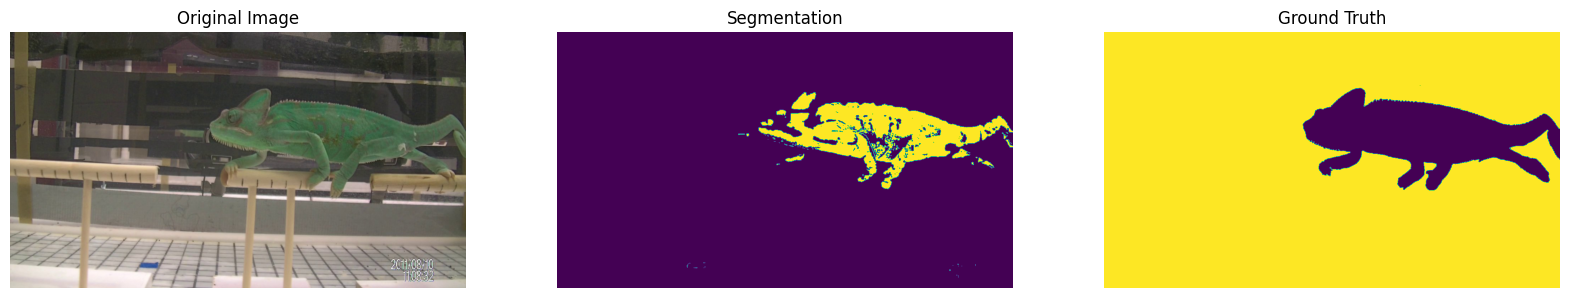

In [7]:
plt.figure(figsize=(20, 10))

for i in range(len(data)):
    plt.figure(figsize=(20, 10))
    plt.subplot(131)
    plt.imshow(data[i][0])
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(data[i][-1])
    plt.title("Segmentation")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(data.gtruth[i])
    plt.title("Ground Truth")
    plt.axis('off')

plt.tight_layout
plt.show()

In [8]:
sk_comp_image = gmask.astype("uint8")

In [9]:
sk_comp_image

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [10]:
from see.Segment_Fitness import FF_MADLAD, FF_LAD, FF_Hamming, FF_Gamma
import skimage as sk

<h1>Noise Functions</h1>

In [11]:
import numpy as np
import random as random
random.seed(1)

In [12]:
test_matrix = np.array(([1,1,1,0],[0,0,0,1],[1,0,1,0]))
# 12 entries 6 zeros 
perc = 0.5
# should get 3 zeros or 3 ones
test_matrix

array([[1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 1, 0]])

In [13]:
def apply_pepper(im, perc):
    """
    Randomly apply pepper(dark) noise to the images.
    Parameters
    ----------
    im: image matrix for the noise application
    perc: percentage of non-dark pixels to change, input interval: [0,1]
    
    Returns 
    -------
    the image matrix after the noise application
    """
    # copy the matrix for output and the original matrix stays same
    matrix = np.copy(im)
    # get the locations of non-zero(white) pixels
    nonzero_pixel_location = np.nonzero(matrix)
    rows = list(nonzero_pixel_location[0])
    columns = list(nonzero_pixel_location[1])
    # get the positions as tuples
    positions = [(rows[i], columns[i]) for i in range(len(rows))]
    # shuffle the positions
    random.shuffle(positions)
    # calculate the count of pixels to change
    count_of_pixel_to_change = int(len(nonzero_pixel_location[1]) * perc)
    for i in range(count_of_pixel_to_change):
        matrix[positions[i][0]][positions[i][1]] = 0
    return matrix

In [14]:
def apply_salt(im, perc):
    """
    Randomly apply salt(white) noise to the images.
    Parameters
    ----------
    im: image matrix for the noise application
    perc: percentage of non-white pixels to change, input interval: [0,1]

    Returns
    -------
    the image matrix after the noise application
    """
    # copy the matrix for output and the original matrix stays same
    matrix = np.copy(im)
    # get the positions of dark pixels
    positions = np.argwhere(matrix == 0)
    positionsT = positions.T
    positions = list(zip(positionsT[0], positionsT[1]))
    # shuffle the positions
    random.shuffle(positions)
    # calculate the count of pixels to change
    count_of_pixel_to_change = int(len(positions) * perc)
    for i in range(count_of_pixel_to_change):
        matrix[positions[i][0]][positions[i][1]] = 1
    return matrix

In [15]:
def apply_salt_and_pepper(im, perc):
    """
    Randomly apply salt and pepper noise by inverting ones and zeroes.
    Parameters
    ----------
    im: image matrix for the noise application
    perc: percentage of pixels to change, input interval: [0,1]

    Returns
    -------
    the image matrix after the noise application
    """
    # copy the matrix for output and the original matrix stays same
    matrix = np.copy(im)
    # get the position of every pixel in the matrix
    positions = list(np.ndindex(matrix.shape))
    # shuffle the positions
    random.shuffle(positions)
    # calculate the count of pixels to change
    count_of_pixel_to_change = int(len(positions) * perc)
    for i in range(count_of_pixel_to_change):
        matrix[positions[i][0]][positions[i][1]] = 1 if matrix[positions[i][0]][positions[i][1]] == 0 else 0
    return matrix

In [16]:
test_matrix = apply_salt_and_pepper(test_matrix, perc)

In [17]:
test_matrix

array([[0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 1, 1]])

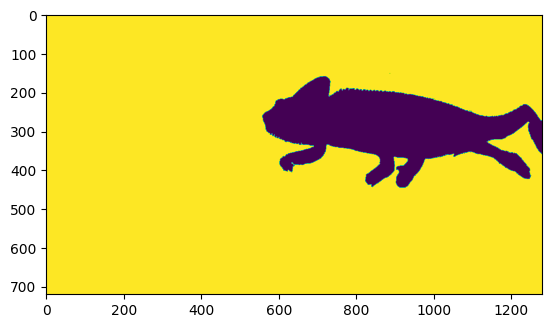

In [18]:
plt.imshow(sk_comp_image)

In [19]:
salt = apply_salt(sk_comp_image, 0.5)

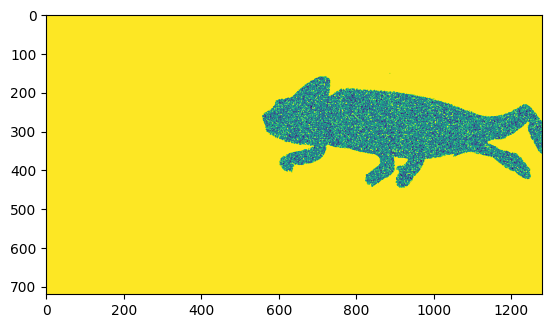

In [20]:
plt.imshow(salt)

<h1>Salt</h1>

In [21]:
init_value_list = [0.1 * i for i in range(11)]
initial_val = 0.00

In [22]:
salt_list = []
salt_select_list = []
for i in range (11):
        salt = apply_salt(sk_comp_image, init_value_list[i])
        if i % 2 == 0:
            salt_select_list.append(salt)
        salt_list.append(salt)

In [23]:
madlad_value_list = []
for i in range(11):
    value = FF_MADLAD(gmask, salt_list[i])
    madlad_value_list.append(value)

In [24]:
lad_value_list = []
for i in range(11):
    value = FF_LAD(gmask, salt_list[i])
    lad_value_list.append(value)

In [25]:
hamming_value_list = []
for i in range(11):
    value = FF_Hamming(gmask, salt_list[i])[0]
    hamming_value_list.append(value)

In [26]:
gamma_value_list = []
for i in range(11):
    value = FF_Gamma(gmask, salt_list[i])[0]
    gamma_value_list.append(value)

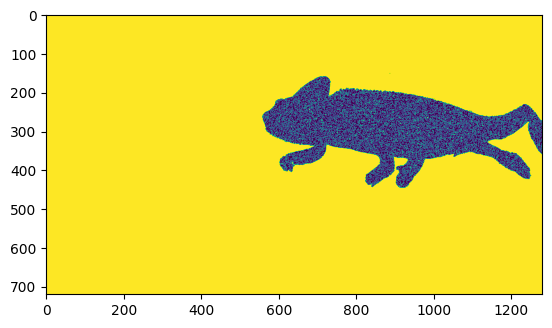

In [27]:
plt.imshow(salt_select_list[1])

In [28]:
salt_select_list[1]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

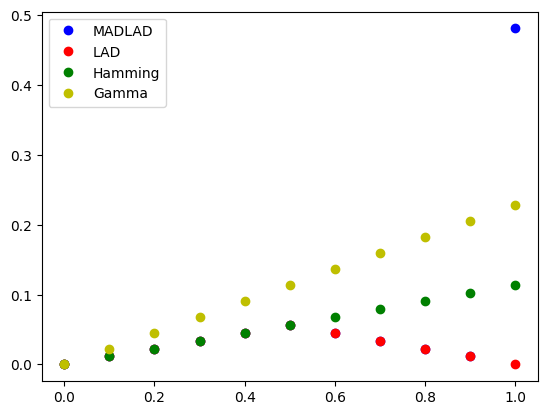

In [29]:
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")
plt.plot(init_value_list, hamming_value_list, "go", label = "Hamming")
plt.plot(init_value_list, gamma_value_list, "yo", label = "Gamma")
plt.legend()

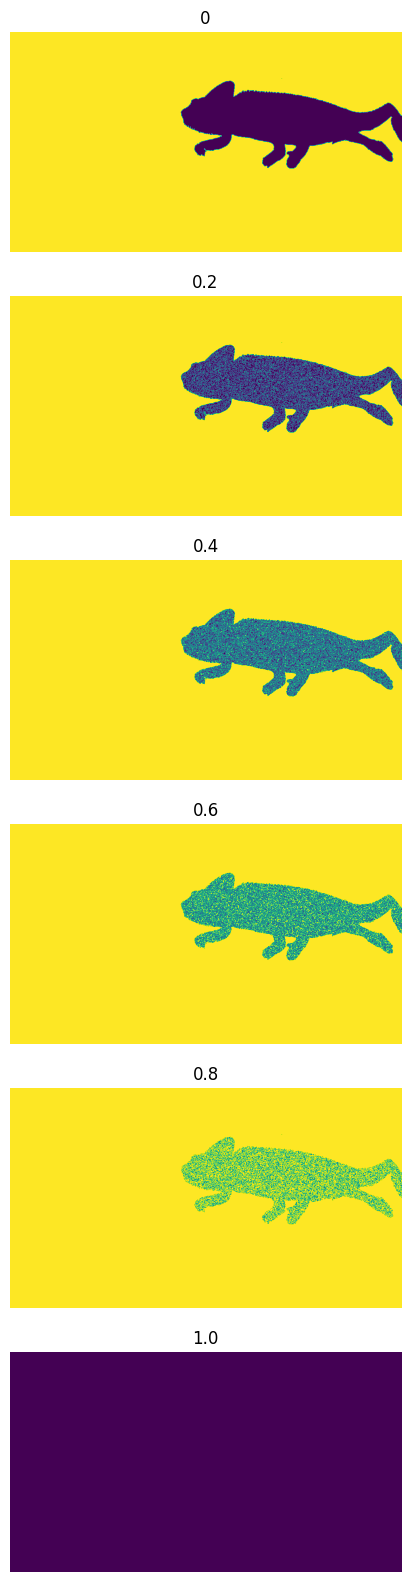

In [30]:
# Plotting images side by side
fig, axes = plt.subplots(len(salt_select_list), 1, figsize=(50, 20))  # Adjust the figsize as needed
init = 0
for ax, image in zip(axes, salt_select_list):
    ax.imshow(image)
    ax.set_title(str(round(init,2)))
    ax.axis('off')  # Turn off axis
    init += 0.2


plt.show()

In [31]:
salt_select_list[5]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

<h1>PEPPER</h1>

In [32]:
init_value_list = [0.1 * i for i in range(11)]
initial_val = 0.00

In [33]:
pepper_list = []
pepper_select_list = []
for i in range (11):
        pepper = apply_pepper(sk_comp_image, init_value_list[i])
        if i % 2 == 0:
            pepper_select_list.append(pepper)
        pepper_list.append(pepper)

In [34]:
madlad_value_list = []
for i in range(11):
    value = FF_MADLAD(gmask, pepper_list[i])
    madlad_value_list.append(value)

In [35]:
lad_value_list = []
for i in range(11):
    value = FF_LAD(gmask, pepper_list[i])
    lad_value_list.append(value)

In [36]:
hamming_value_list = []
for i in range(11):
    value = FF_Hamming(gmask, pepper_list[i])[0]
    hamming_value_list.append(value)

In [37]:
gamma_value_list = []
for i in range(11):
    value = FF_Gamma(gmask, pepper_list[i])[0]
    gamma_value_list.append(value)

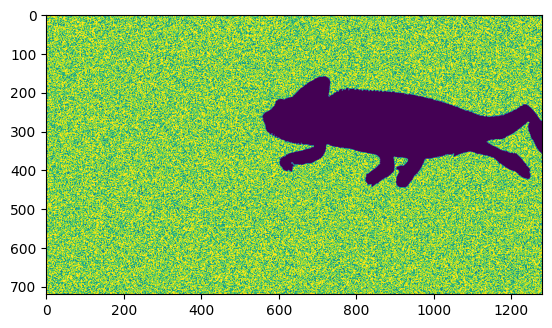

In [38]:
for im in pepper_select_list:
    plt.imshow(pepper_select_list[1])

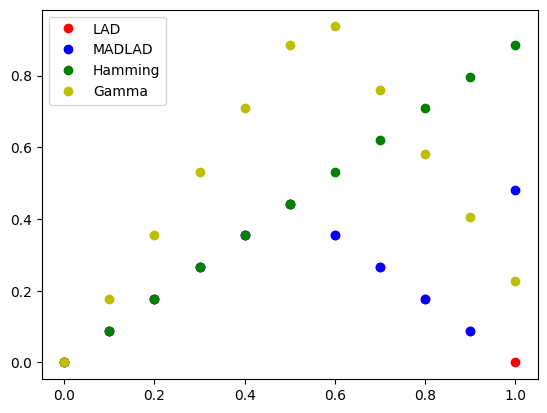

In [39]:
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")
plt.plot(init_value_list, hamming_value_list, "go", label = "Hamming")
plt.plot(init_value_list, gamma_value_list, "yo", label = "Gamma")
plt.legend()

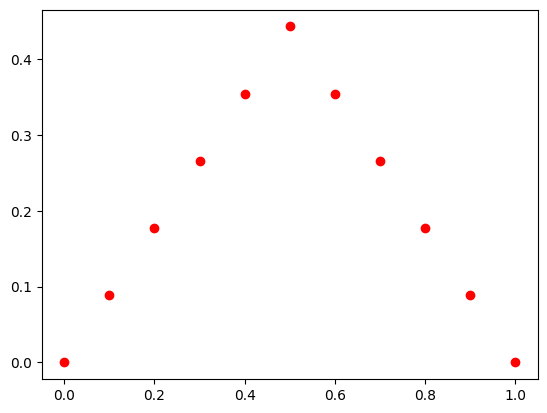

In [40]:
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")

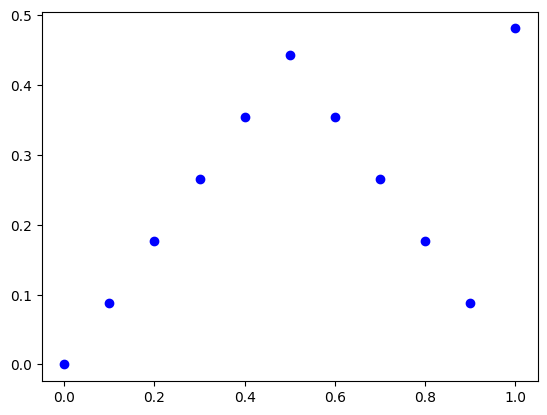

In [41]:
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")

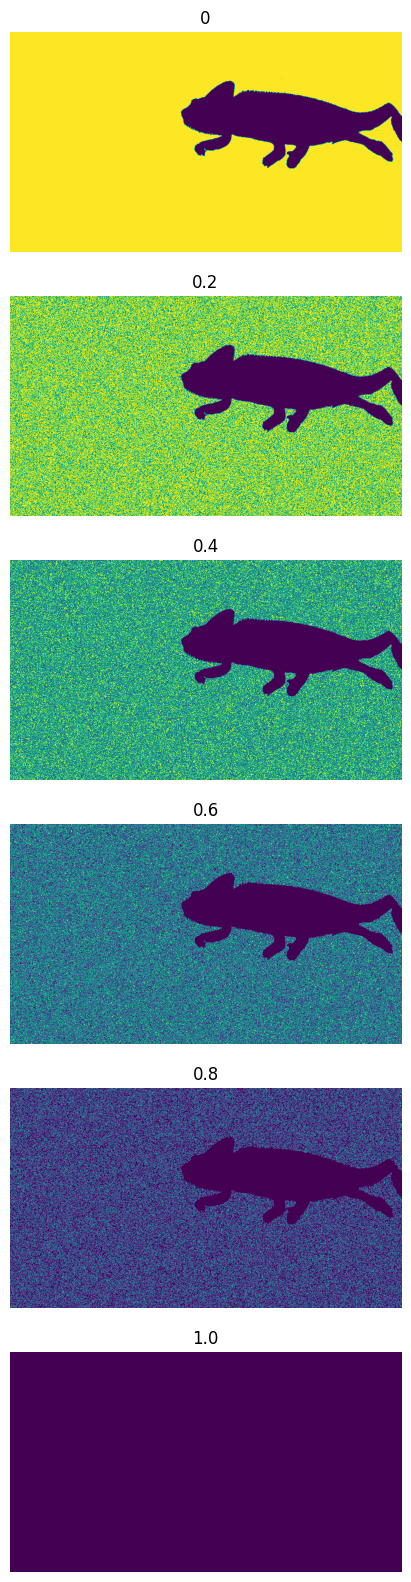

In [42]:
# Plotting images side by side
fig, axes = plt.subplots(len(pepper_select_list), 1, figsize=(50, 20))  # Adjust the figsize as needed
init = 0
for ax, image in zip(axes, pepper_select_list):
    ax.imshow(image)
    ax.set_title(str(round(init,2)))
    ax.axis('off')  # Turn off axis
    init += 0.2


plt.show()

<h1>Salt & Pepper</h1>

In [43]:
init_value_list = [0.1 * i for i in range(11)]
initial_val = 0.00

In [44]:
s_p_list = []
s_p_select_list = []
for i in range (11):
        s_p = apply_salt_and_pepper(sk_comp_image, init_value_list[i])
        if i % 2 == 0:
            s_p_select_list.append(s_p)
        s_p_list.append(s_p)

In [45]:
madlad_value_list = []
for i in range(11):
    value = FF_MADLAD(gmask, s_p_list[i])
    madlad_value_list.append(value)

In [46]:
lad_value_list = []
for i in range(11):
    value = FF_LAD(gmask, s_p_list[i])
    lad_value_list.append(value)

In [47]:
hamming_value_list = []
for i in range(11):
    value = FF_Hamming(gmask, s_p_list[i])[0]
    hamming_value_list.append(value)

In [48]:
gamma_value_list = []
for i in range(11):
    value = FF_Gamma(gmask, s_p_list[i])[0]
    gamma_value_list.append(value)

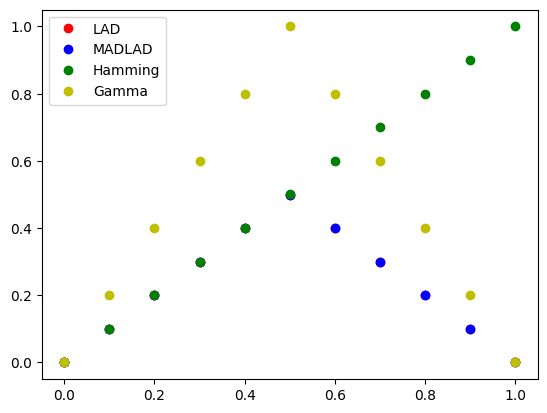

In [49]:
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")
plt.plot(init_value_list, hamming_value_list, "go", label = "Hamming")
plt.plot(init_value_list, gamma_value_list, "yo", label = "Gamma")
plt.legend()

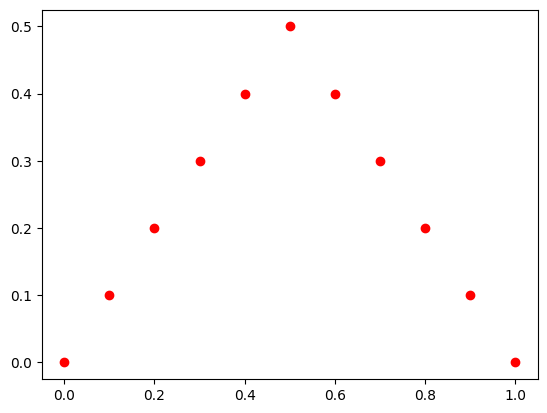

In [50]:
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")

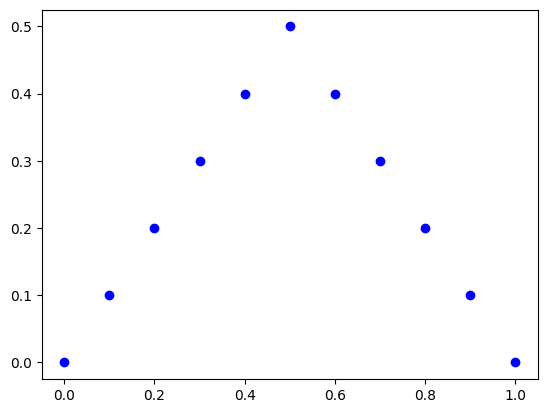

In [51]:
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")

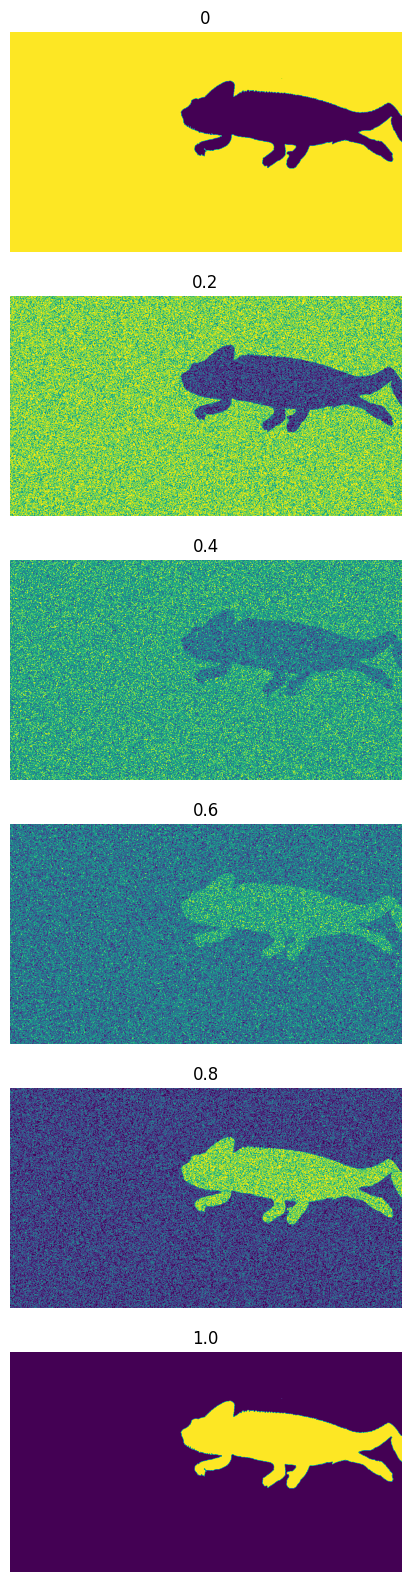

In [52]:
# Plotting images side by side
fig, axes = plt.subplots(len(s_p_select_list), 1, figsize=(50, 20))  # Adjust the figsize as needed
init = 0
for ax, image in zip(axes, s_p_select_list):
    ax.imshow(image)
    ax.set_title(str(round(init,2)))
    ax.axis('off')  # Turn off axis
    init += 0.2


plt.show()

<h1>Closing Operation</h1>

In [53]:
import skimage

In [54]:
init_value_list = [0.1 * i for i in range(11)]
initial_val = 0.00

In [55]:
closing_list = []
closing_select_list = []
for i in range (11):
        closing = skimage.morphology.binary_closing(sk_comp_image, skimage.morphology.disk(int(init_value_list[i] * 20)))
        if i % 2 == 0:
            closing_select_list.append(closing)
        closing_list.append(closing)

In [56]:
madlad_value_list = []
for i in range(11):
    value = FF_MADLAD(gmask, closing_list[i])
    madlad_value_list.append(value)

In [57]:
lad_value_list = []
for i in range(11):
    value = FF_LAD(gmask, closing_list[i])
    lad_value_list.append(value)

In [58]:
hamming_value_list = []
for i in range(11):
    value = FF_Hamming(gmask, closing_list[i])[0]
    hamming_value_list.append(value)

In [59]:
gamma_value_list = []
for i in range(11):
    value = FF_Gamma(gmask, closing_list[i])[0]
    gamma_value_list.append(value)

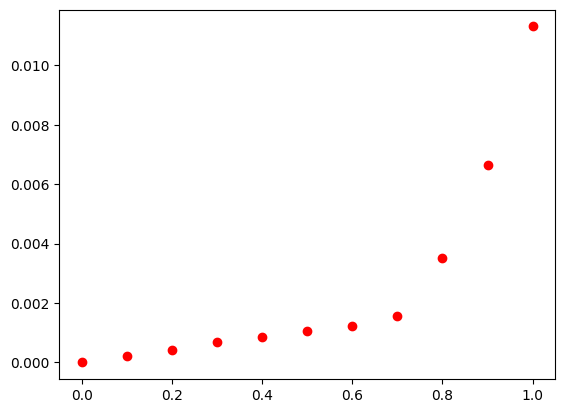

In [60]:
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")

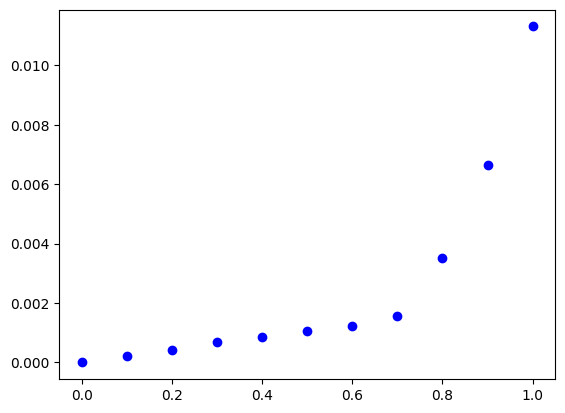

In [61]:
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")

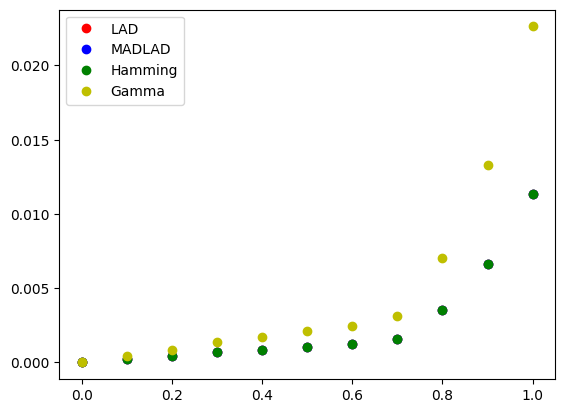

In [62]:
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")
plt.plot(init_value_list, hamming_value_list, "go", label = "Hamming")
plt.plot(init_value_list, gamma_value_list, "yo", label = "Gamma")
plt.legend()

<p>LAD, MADLAD and Hamming give the same fitness values.</p>

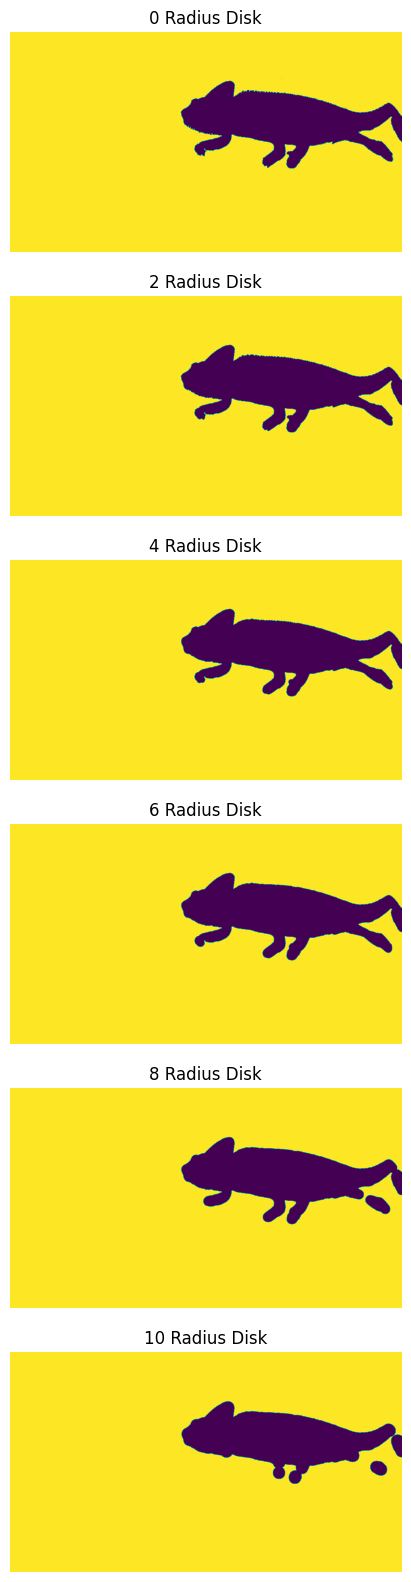

In [76]:
# Plotting images side by side
fig, axes = plt.subplots(len(closing_select_list), 1, figsize=(50, 20))  # Adjust the figsize as needed
init = 0
for ax, image in zip(axes, closing_select_list):
    ax.imshow(image)
    ax.set_title("{:d} Radius Disk".format(init, init))
    ax.axis('off')  # Turn off axis
    init += 2


plt.show()

<h1>Opening Operation</h1>

In [64]:
init_value_list = [0.1 * i for i in range(11)]
initial_val = 0.00

In [65]:
opening_list = []
opening_select_list = []
for i in range (11):
        opening = skimage.morphology.binary_opening(sk_comp_image, skimage.morphology.disk(int(init_value_list[i] * 20)))
        if i % 2 == 0:
            opening_select_list.append(opening)
        opening_list.append(opening)

In [66]:
madlad_value_list = []
for i in range(11):
    value = FF_MADLAD(gmask, opening_list[i])
    madlad_value_list.append(value)

In [67]:
lad_value_list = []
for i in range(11):
    value = FF_LAD(gmask, opening_list[i])
    lad_value_list.append(value)

In [68]:
hamming_value_list = []
for i in range(11):
    value = FF_Hamming(gmask, opening_list[i])[0]
    hamming_value_list.append(value)

In [69]:
gamma_value_list = []
for i in range(11):
    value = FF_Gamma(gmask, opening_list[i])[0]
    gamma_value_list.append(value)

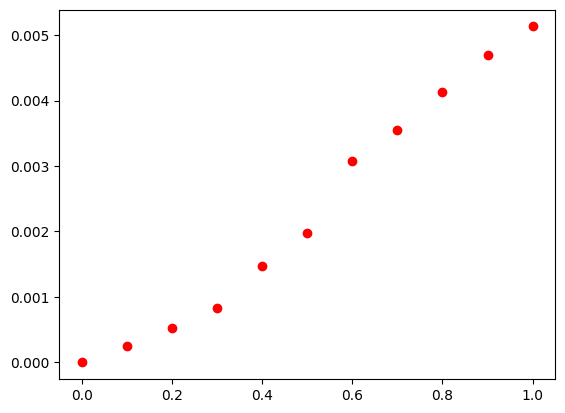

In [70]:
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")

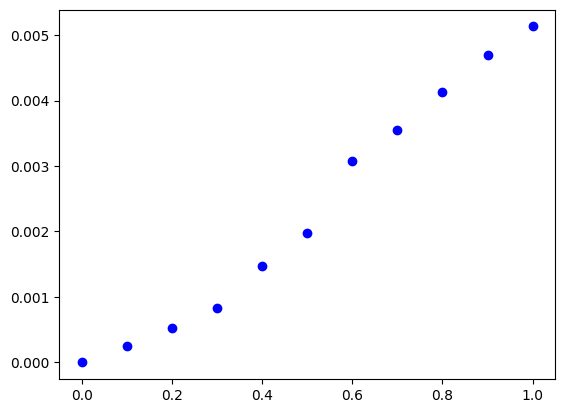

In [71]:
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")

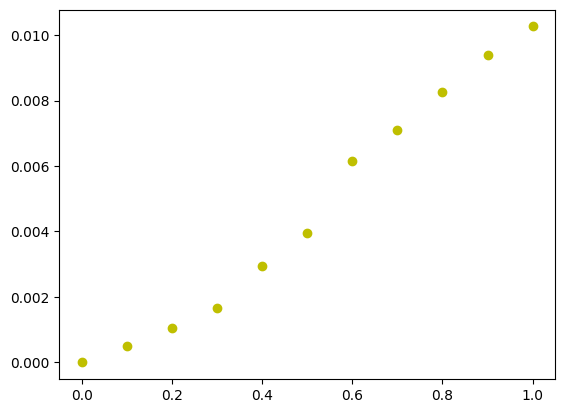

In [72]:
plt.plot(init_value_list, gamma_value_list, "yo", label = "Gamma")

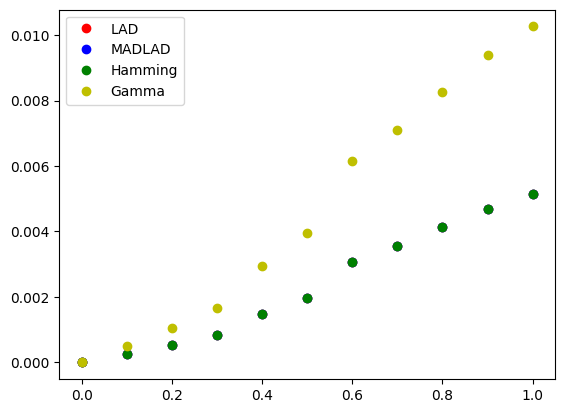

In [73]:
plt.plot(init_value_list, lad_value_list, "ro", label = "LAD")
plt.plot(init_value_list, madlad_value_list, "bo", label = "MADLAD")
plt.plot(init_value_list, hamming_value_list, "go", label = "Hamming")
plt.plot(init_value_list, gamma_value_list, "yo", label = "Gamma")
plt.legend()

<p>LAD, MADLAD and Hamming give the same results.</p>

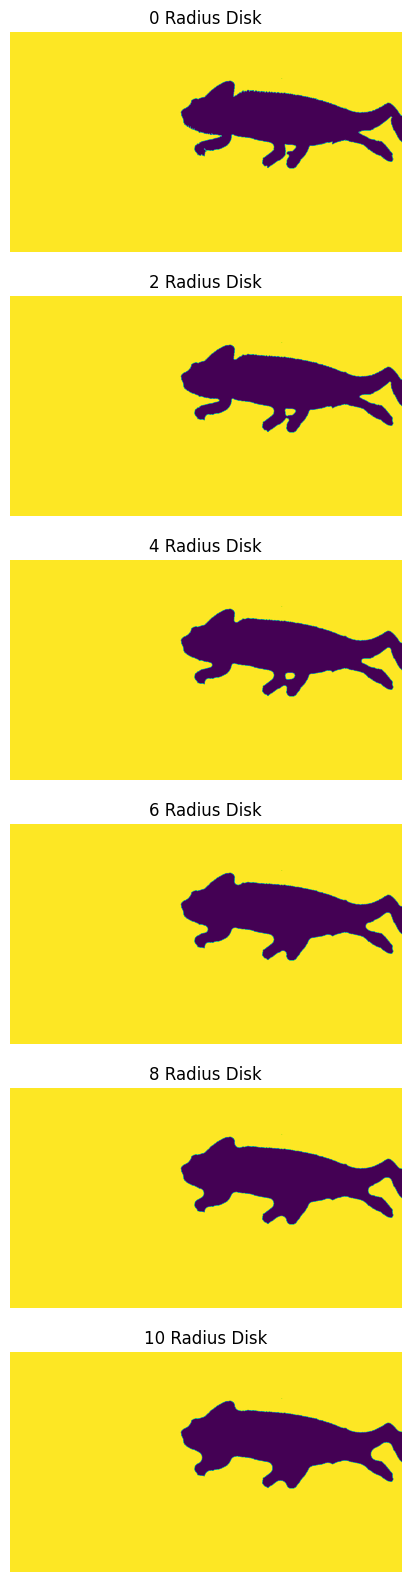

In [75]:
# Plotting images side by side
fig, axes = plt.subplots(len(opening_select_list), 1, figsize=(50, 20))  # Adjust the figsize as needed
init = 0
for ax, image in zip(axes, opening_select_list):
    ax.imshow(image)
    ax.set_title("{:d} Radius Disk".format(init, init))
    ax.axis('off')  # Turn off axis
    init += 2


plt.show()